# 파일 및 라이브러리 불러오기

In [34]:
#필요한 라이브러리 호출
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [35]:
#파일 불러오기
data = pd.read_csv("FIFA.csv", index_col = None)

In [36]:
df = data.copy()

# 데이터 구조 확인하기


| 변수 | 설명 
| --- | --- | 
| id | 선수 고유의 아이디 |  
| name | 이름 |
| age | 나이 |
| continent | 선수들의 국적이 포함되어 있는 대륙 | 
| contract_until | 선수의 계약기간 만료시기 |  
| position | 선수가 선호하는 포지션 ex) 공격수, 수비수|  
| prefer_foot | 선수가 선호하는 발 ex) 오른발 |  
| reputation | 선수가 유명도 - 높은 수치일 수록 유명한 선수 |  
| stat_overall | 선수의 현재 능력치 |  
| stat_potential | 선수가 경험 및 노력을 통해 발전할 수 있는 정도 |  
| stat_skill_moves | 선수의 개인기 능력치 |  
| value | FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) |  


In [37]:
# 데이터프레임 상위 5개 행 확인
df.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,11784.0,T. Lindenhahn,27,europe,2021,DF,?,1,63.0,63.0,3,300000
1,2436.0,V. Misidjan,24,europe,2021,MF,?,1,74.0,77.0,3,7000000
2,8196.0,S. Aresti,32,europe,2020,GK,?,1,67.0,67.0,1,450000
3,16446.0,H. Al Ruwaili,23,asia,2020,DF,?,1,53.0,60.0,2,70000
4,7388.0,E. Soriano,29,europe,2019,ST,?,1,67.0,67.0,2,750000


## 과제 1 : 데이터프레임의 하위 5개 행을 출력해주세요 !

In [38]:
# 데이터프레임 하위 7개 행 확인
df.tail(7)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8925,7805.0,C. Sepúlveda,26,south america,2019,MF,right,1,67.0,72.0,2,850000
8926,10746.0,I. Abass,19,africa,2023,ST,right,1,64.0,77.0,3,850000
8927,5424.0,D. Odoi,30,europe,2019,DF,right,1,69.0,69.0,3,775000
8928,16664.0,M. Tilio,16,oceania,2019,MF,left,1,52.0,69.0,2,100000
8929,13515.0,V. Myhra,21,europe,2018,GK,right,1,61.0,72.0,1,350000
8930,876.0,R. Vormer,30,europe,2022,MF,right,2,78.0,78.0,3,9500000
8931,13317.0,H. Eisa,25,africa,2019,ST,right,1,61.0,NaN,2,350000


# 결측치 처리하기

## 결측치 확인하기

In [39]:
# 결측치 확인
df.isnull().sum()

id                   176
name                   0
age                    0
continent              0
contract_until         0
position               0
prefer_foot            0
reputation             0
stat_overall         130
stat_potential      1792
stat_skill_moves       0
value                  0
dtype: int64

결측치가 존재하는 __id, stat_overall, stat_potential__ 컬럼을 처리해보겠습니다.

### 과제2: describe 함수를 활용해 데이터의 평균, 4분위수, 최소값, 최대값을 확인해주세요 !

In [40]:
#데이터프레임 각 칼럼의 통계치 확인
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8756.000000,8932.000000,8932.000000,8802.000000,7140.000000,8932.000000,8.932000e+03
mean,7972.833029,25.209136,1.130878,67.100091,72.003081,2.401702,2.778673e+06
std,4842.075657,4.635515,0.423792,6.854393,5.981808,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3755.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7707.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12084.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## id 컬럼 삭제하기

id 컬럼은 이적료를 예측하는데 도움이 되지 않기 때문에 컬럼을 삭제합니다. 

### 과제3 : drop 함수를 활용해 id 컬럼 전체를 삭제해주세요 !

In [41]:
df.drop(['id'], axis = 1, inplace = True)

In [42]:
df

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,T. Lindenhahn,27,europe,2021,DF,?,1,63.0,63.0,3,300000
1,V. Misidjan,24,europe,2021,MF,?,1,74.0,77.0,3,7000000
2,S. Aresti,32,europe,2020,GK,?,1,67.0,67.0,1,450000
3,H. Al Ruwaili,23,asia,2020,DF,?,1,53.0,60.0,2,70000
4,E. Soriano,29,europe,2019,ST,?,1,67.0,67.0,2,750000
...,...,...,...,...,...,...,...,...,...,...,...
8927,D. Odoi,30,europe,2019,DF,right,1,69.0,69.0,3,775000
8928,M. Tilio,16,oceania,2019,MF,left,1,52.0,69.0,2,100000
8929,V. Myhra,21,europe,2018,GK,right,1,61.0,72.0,1,350000
8930,R. Vormer,30,europe,2022,MF,right,2,78.0,78.0,3,9500000


## prefer_foot 컬럼 처리하기

### 과제4 : value_counts 함수를 활용해 prefer_foot 컬럼의 데이터 통계를 확인해주세요 !

In [43]:
df[['prefer_foot']].value_counts()

prefer_foot
right          6452
left           1980
?               500
dtype: int64

### 과제5 : 최빈값으로 ?(결측치)를 대체해주세요 !

In [44]:
#결측치를 최빈값인 right로 대체
df = df.replace({'prefer_foot' :'?'}, 'right')

In [45]:
#결측치 처리 확인
df[['prefer_foot']].value_counts()

prefer_foot
right          6952
left           1980
dtype: int64

## stat_overal / stat_potential 컬럼 처리하기

__stat_potential, stat_overall__ 컬럼 간의 관계를 파악하고, 관련이 높다면 각각의 값을 이용하는 방법으로 결측치를 처리해줍니다.

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

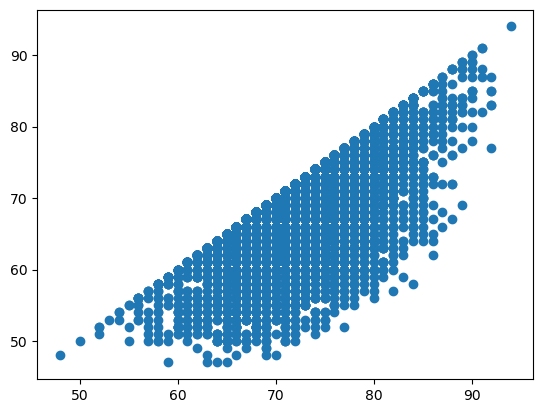

In [47]:
# scatterplot을 통해 상관관계 확인
plt.scatter(df.stat_potential, df.stat_overall)

<Axes: >

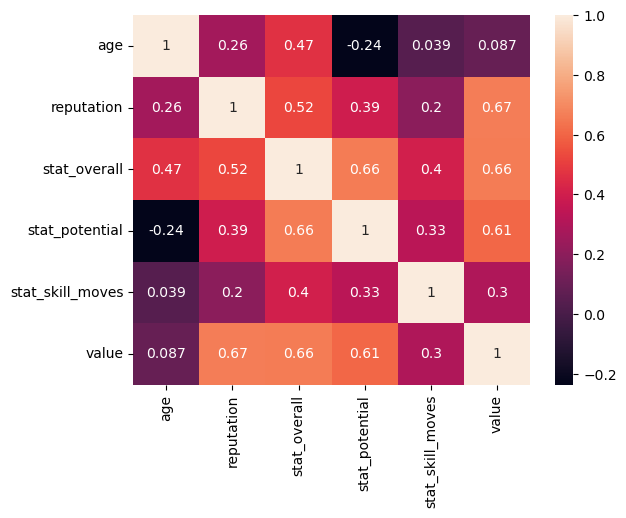

In [48]:
# 문자열 열을 제외한 숫자 열만 선택
numeric_columns = df.select_dtypes(include=[np.number])

# heatmap을 통해 숫자 열 간의 상관계수 파악
sns.heatmap(numeric_columns.corr(), annot=True)

__scatter plot__을 봤을 때 두 변수간 선형 관계가 존재하고, __heatmap__에서도 상관계수가 0.66으로 높다는 사실을 알 수 있습니다.  
따라서 결측치를 각각의 값으로 대체해줍니다.  

In [49]:
df1=df.groupby('name')['stat_overall'].transform("mean")
display(df1)

0       63.0
1       74.0
2       67.0
3       53.0
4       67.0
        ... 
8927    69.0
8928    52.0
8929    61.0
8930    78.0
8931    61.0
Name: stat_overall, Length: 8932, dtype: float64

In [50]:
#각각의 값으로 대체
df = df.fillna({'stat_potential':df['stat_overall']})
df = df.fillna({'stat_overall':df['stat_potential']})

In [51]:
# 결측치 확인
df.isnull().sum()

name                 0
age                  0
continent            0
contract_until       0
position             0
prefer_foot          0
reputation           0
stat_overall        20
stat_potential      20
stat_skill_moves     0
value                0
dtype: int64

처리하고 나서도 아직 남아있는 결측치가 20개 남아있습니다.  
값을 삭제해도 큰 문제가 없으므로, 20개를 삭제해 결측치를 처리하겠습니다.  

In [52]:
#결측치 삭제
df.dropna(how = 'any', inplace = True)

In [53]:
#결측치 처리 결과 확인
df.isnull().sum()

name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

# 그래프 시각화하기

In [61]:
#시각화 라이브러리 호출

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
df.head()

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,T. Lindenhahn,27,europe,2021,DF,right,1,63.0,63.0,3,300000
1,V. Misidjan,24,europe,2021,MF,right,1,74.0,77.0,3,7000000
2,S. Aresti,32,europe,2020,GK,right,1,67.0,67.0,1,450000
3,H. Al Ruwaili,23,asia,2020,DF,right,1,53.0,60.0,2,70000
4,E. Soriano,29,europe,2019,ST,right,1,67.0,67.0,2,750000


## 과제6 : position별 value의 변화를 나타내는 catplot을 그리기

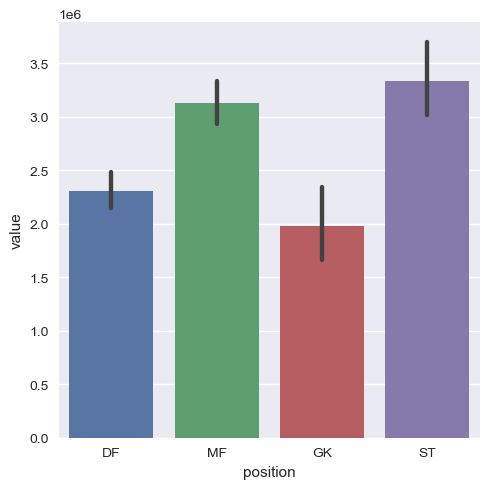

In [63]:
sns.catplot(x='position', y='value', data=df, kind='bar')
plt.show()

## 과제7 : continent별 stat_skill_moves의 변화를 알아보기 위해 두 변수 간 factorplot 그리기

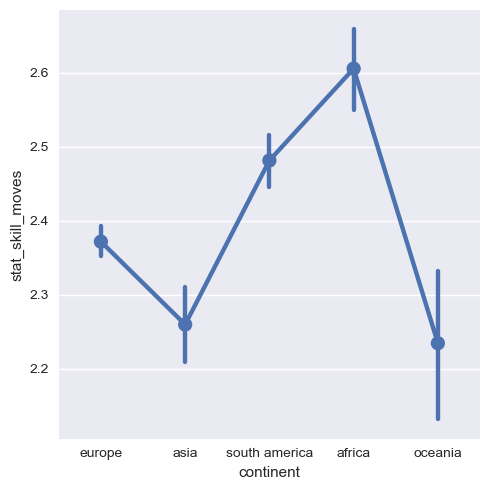

In [64]:
sns.catplot(x='continent', y='stat_skill_moves', data=df, kind='point')

## 과제8 : distplot 함수를 활용해서 value 컬럼의 데이터 분포를 확인하기

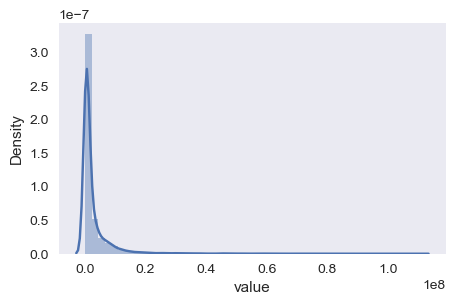

In [66]:
sns.distplot(data['value'])
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.grid(False)

## 과제9 : 두 그래프를 한번에 그리기

1. __position__ 별 선수의 비율을 나타내주는 __PieChart__  
2. __position__ 별 선수가 선호하는 발을 나타내주는 __CountPlot__

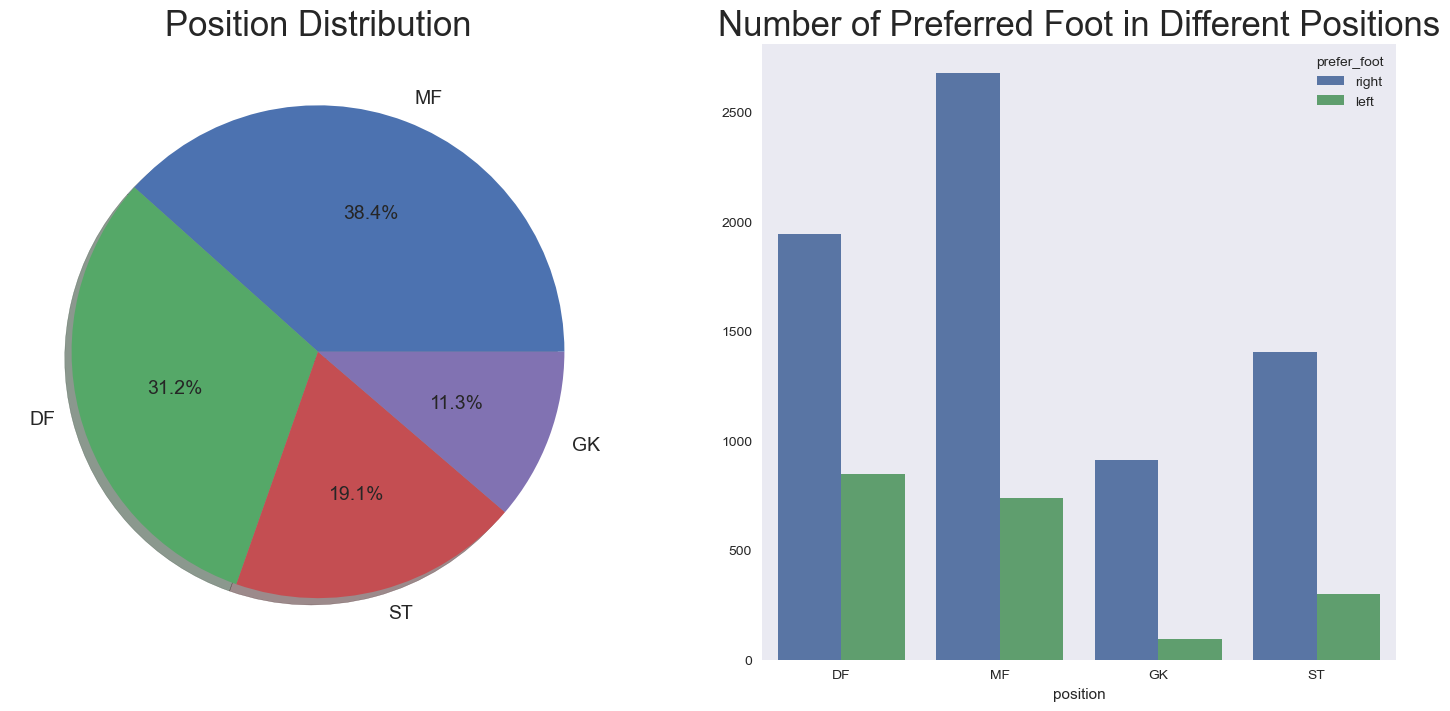

In [72]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 서브플롯: 'position' 열의 분포를 파이 차트로 표시
data['position'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True,
                                         fontsize=14)  # 폰트 크기 설정
ax[0].set_title('Position Distribution', fontsize=25)  # 제목 크기 설정
ax[0].set_ylabel('')

# 두 번째 서브플롯: 'position' 열과 'prefer_foot' 열 간의 관계를 카운트 플롯으로 표시
sns.countplot(x='position',hue='prefer_foot', data=df, ax=ax[1])
ax[1].set_title('Number of Preferred Foot in Different Positions', fontsize=25)  # 제목 크기 설정
ax[1].set_ylabel('')
plt.grid(False)

# 그래프 표시
plt.show()